In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
from adjustText import adjust_text

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

c:\Users\ekene\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ekene\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Nov 11 21:27:20 2024).


job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64


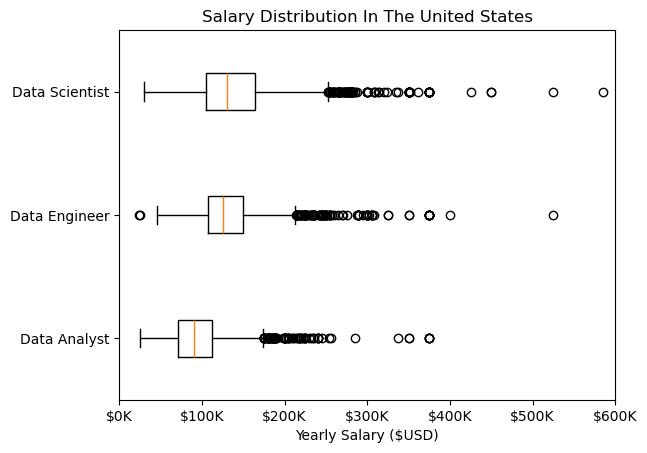

In [31]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')]

df_US = df_US.dropna(subset=['salary_year_avg'])



print(df_US['job_title_short'].value_counts())

(df_US['salary_year_avg'].sample(10))

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

job_list

plt.boxplot(job_list, tick_labels= job_titles, vert= False)
plt.title('Salary Distribution In The United States')
plt.xlabel('Yearly Salary ($USD)')
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

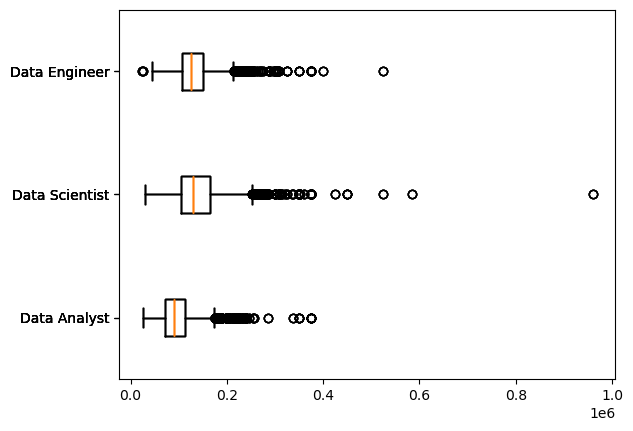

In [25]:
plt.boxplot(job_list, tick_labels= job_titles, vert= False)
plt.show()